#Tree

##Header


In [ ]:
# Load libraries
import pandas as pd
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier 
# Import train_test_split function
from sklearn.model_selection import train_test_split 
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics 

##Data

In [ ]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("diabetes.csv", header=None, names=col_names)
pima = pima.drop(pima.index[0])
# this dataset is stored in a local directory

In [ ]:
#view data
pima.head()

pregnant glucose  bp skin insulin   bmi pedigree age label
1        6     148  72   35       0  33.6    0.627  50     1
2        1      85  66   29       0  26.6    0.351  31     0
3        8     183  64    0       0  23.3    0.672  32     1
4        1      89  66   23      94  28.1    0.167  21     0
5        0     137  40   35     168  43.1    2.288  33     1

##Feature

In [ ]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
# Features
X = pima[feature_cols]
# Target variable
y = pima.label 


##Splitting data


In [ ]:
''' Split dataset into training set and test set
80% training and 20% test'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
pima.head()

pregnant glucose  bp skin insulin   bmi pedigree age label
1        6     148  72   35       0  33.6    0.627  50     1
2        1      85  66   29       0  26.6    0.351  31     0
3        8     183  64    0       0  23.3    0.672  32     1
4        1      89  66   23      94  28.1    0.167  21     0
5        0     137  40   35     168  43.1    2.288  33     1

## Decision tree model

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7142857142857143


##Graphic dependences

In [ ]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pydotplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Vizualization tree

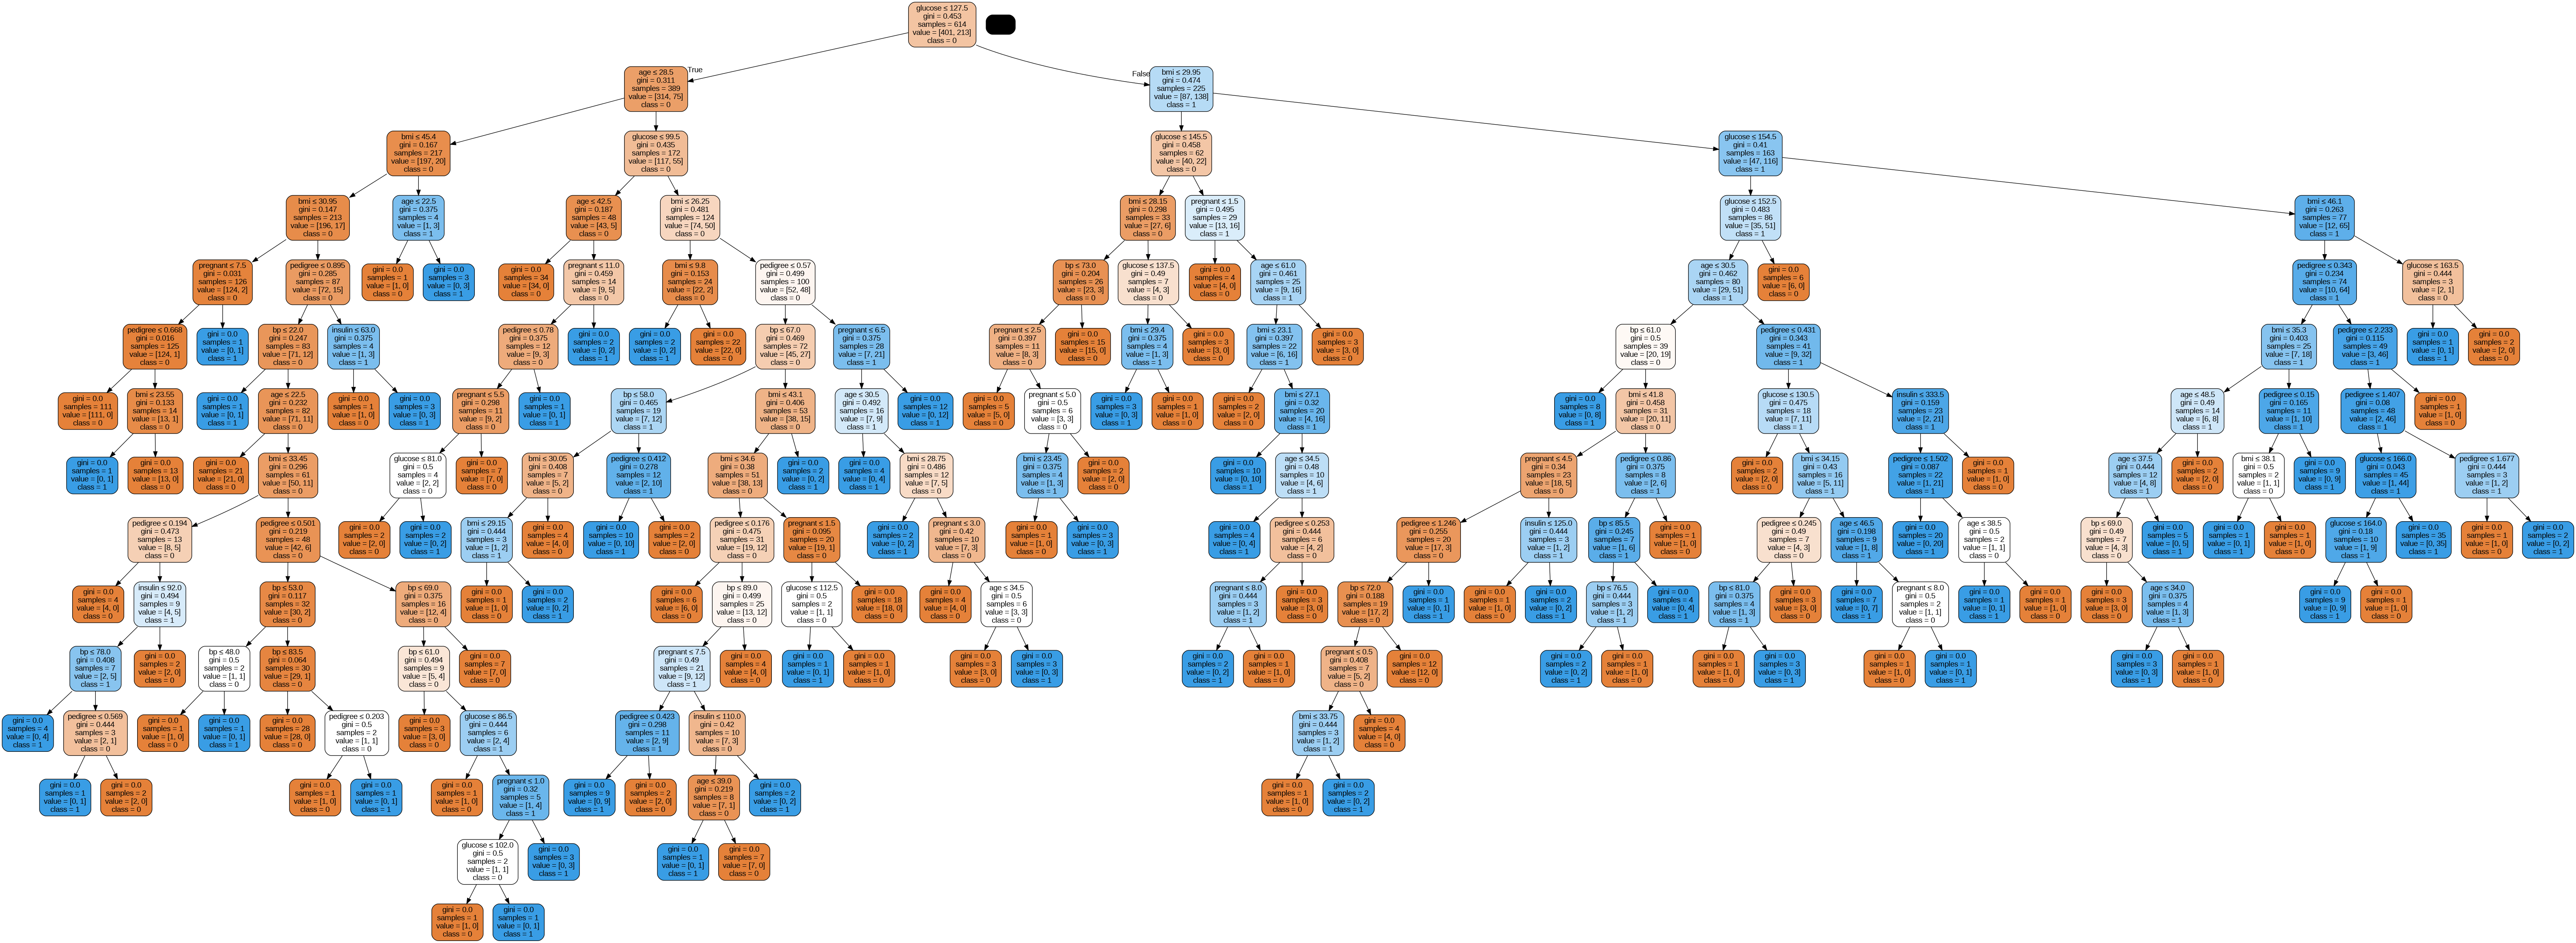

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

## Optimization

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy")
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7207792207792207


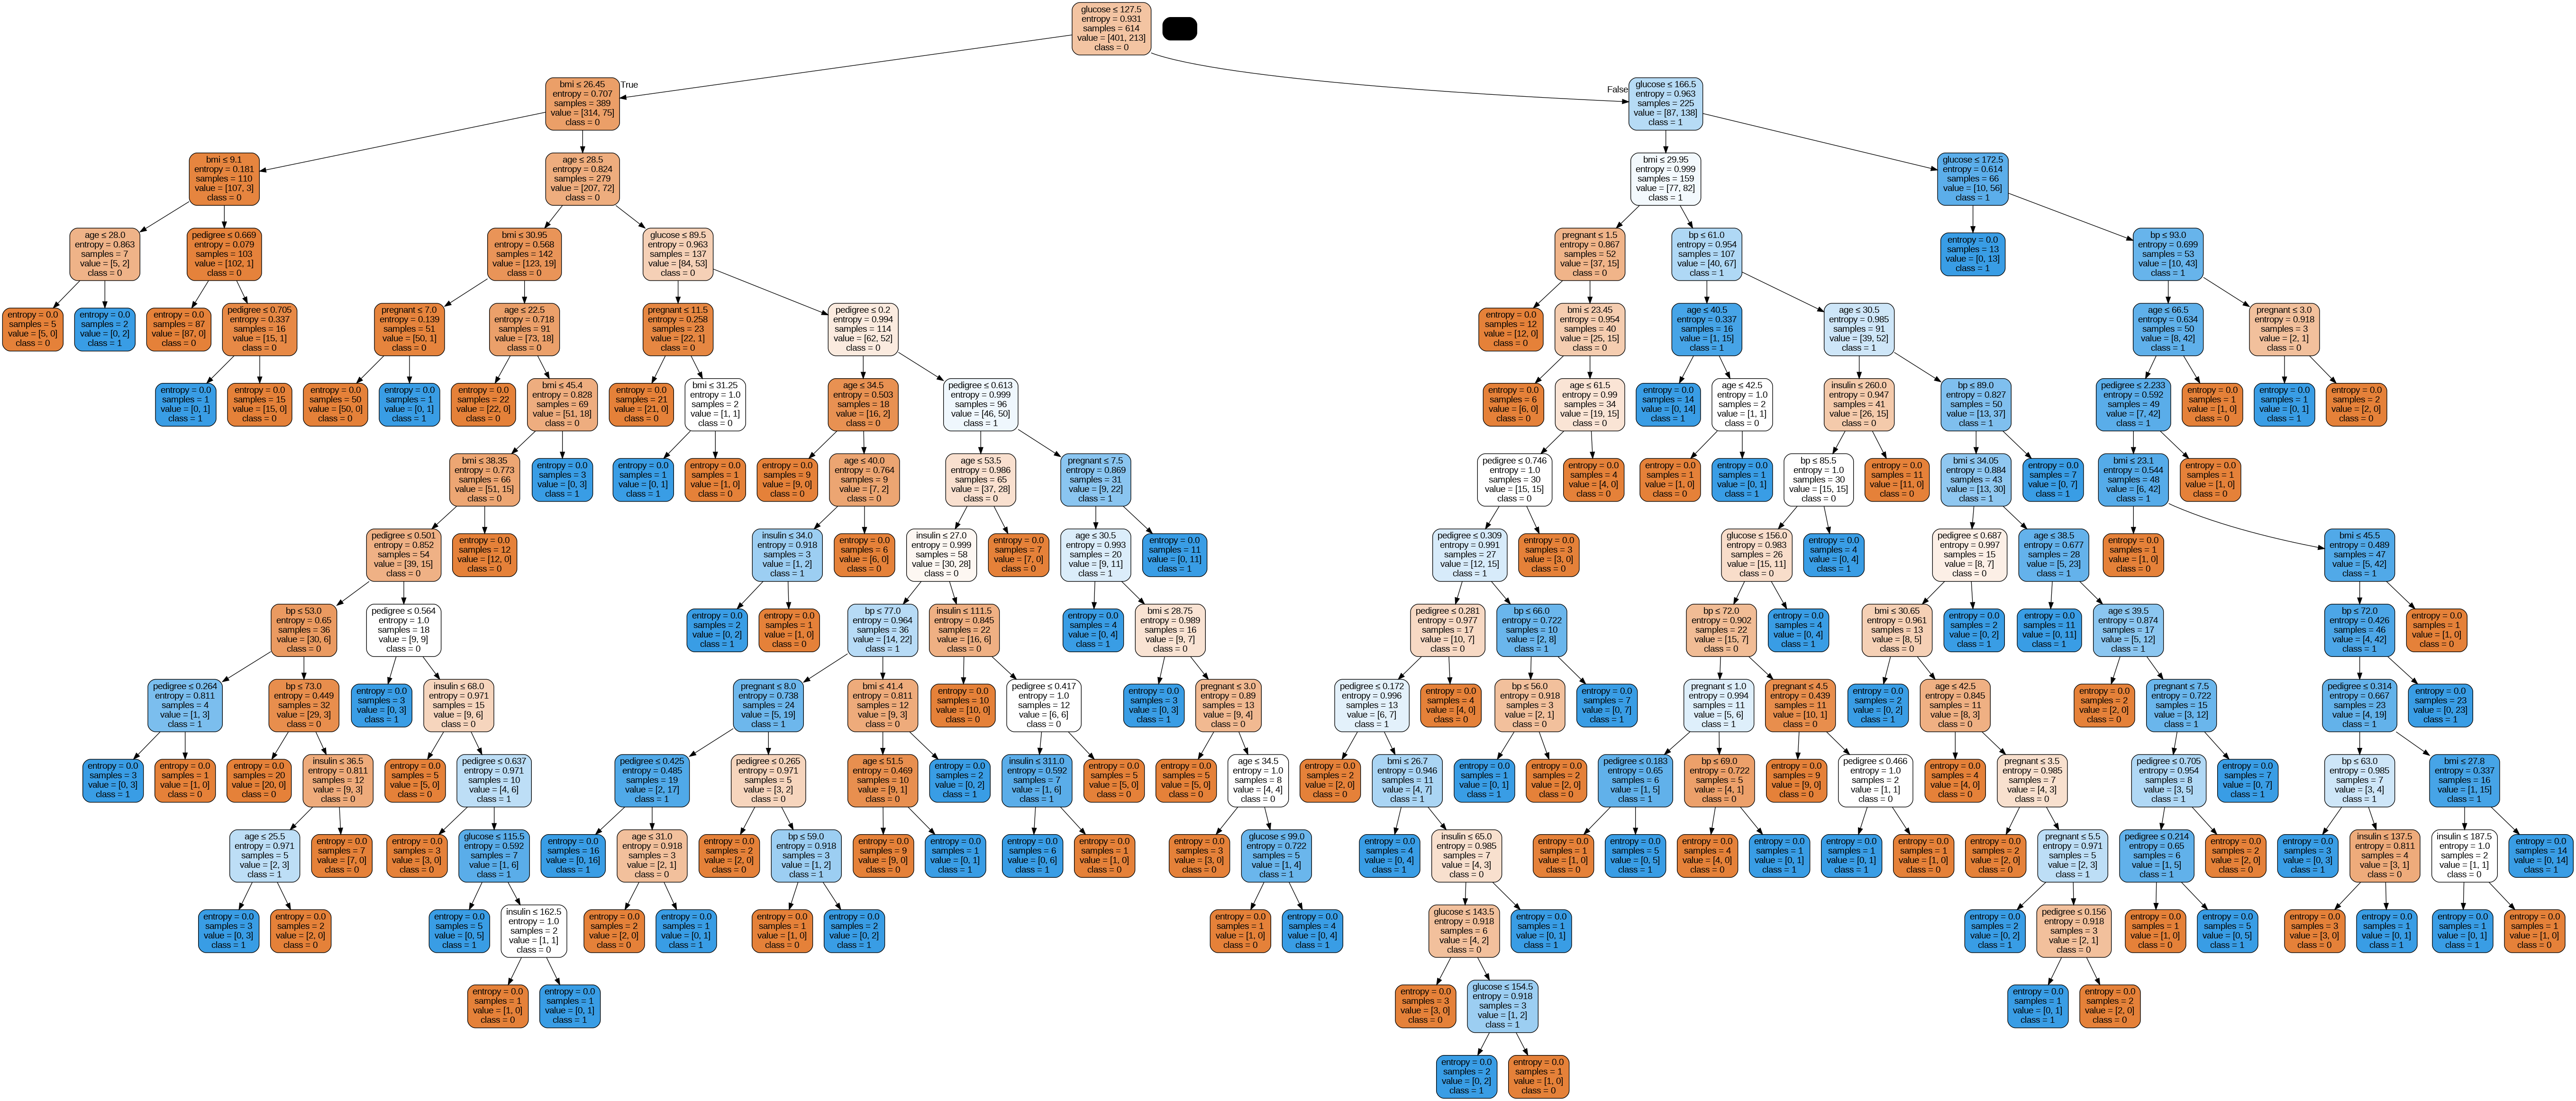

In [ ]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

##Testing with unique data

In [108]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy")
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print(f'the test has {len(X_test)} batchs')
listProb = clf.predict_proba(X_test)
if y_pred[22] == '1':
  class_out = 'with diabetes'
else:
  class_out = 'without diabetes' 


print(f'the batch 0 is {y_pred[22]} %s' %(class_out))
print(f'prob {listProb[22]}')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

the test has 154 batchs
the batch 0 is 1 with diabetes
prob [0. 1.]
Accuracy: 0.6818181818181818


#Forest

###Header

In [18]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

###Data

In [4]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima_1 = pd.read_csv("diabetes.csv", header=None, names=col_names)
pima_1 = pima_1.drop(pima_1.index[0])
# this dataset is stored in a local directory

In [5]:
#view data
pima_1.head()

pregnant glucose  bp skin insulin   bmi pedigree age label
1        6     148  72   35       0  33.6    0.627  50     1
2        1      85  66   29       0  26.6    0.351  31     0
3        8     183  64    0       0  23.3    0.672  32     1
4        1      89  66   23      94  28.1    0.167  21     0
5        0     137  40   35     168  43.1    2.288  33     1

###Feature

In [6]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
# Features
X = pima_1[feature_cols]
# Target variable
y = pima_1.label 


###Splitting data

In [8]:
''' Split dataset into training set and test set
80% training and 20% test'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
pima_1.head()

pregnant glucose  bp skin insulin   bmi pedigree age label
1        6     148  72   35       0  33.6    0.627  50     1
2        1      85  66   29       0  26.6    0.351  31     0
3        8     183  64    0       0  23.3    0.672  32     1
4        1      89  66   23      94  28.1    0.167  21     0
5        0     137  40   35     168  43.1    2.288  33     1

###Decision Tree Model

In [10]:
# Create Decision Tree classifer object
clf = RandomForestClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [11]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8051948051948052


###Graphic dependeces

In [12]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
!pip install pydotplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


###Vizualization forest

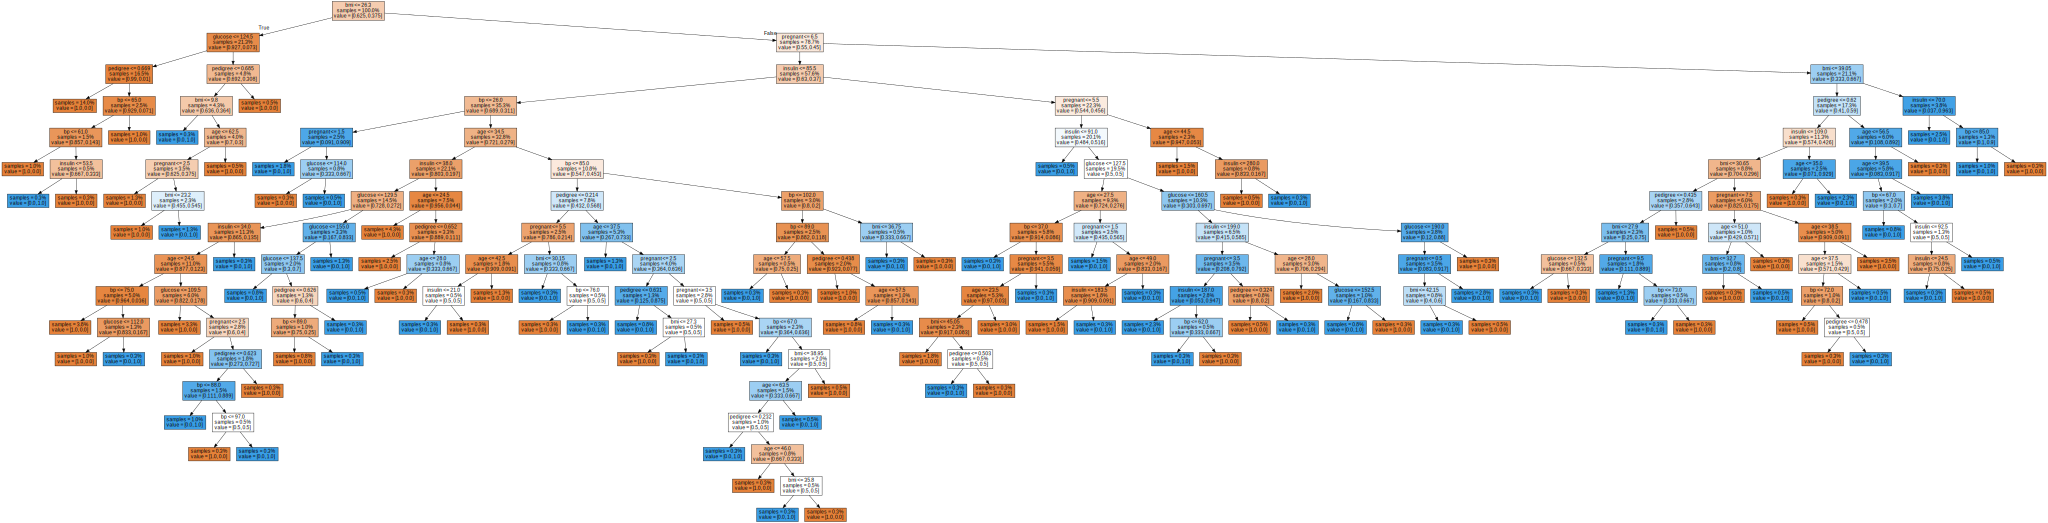

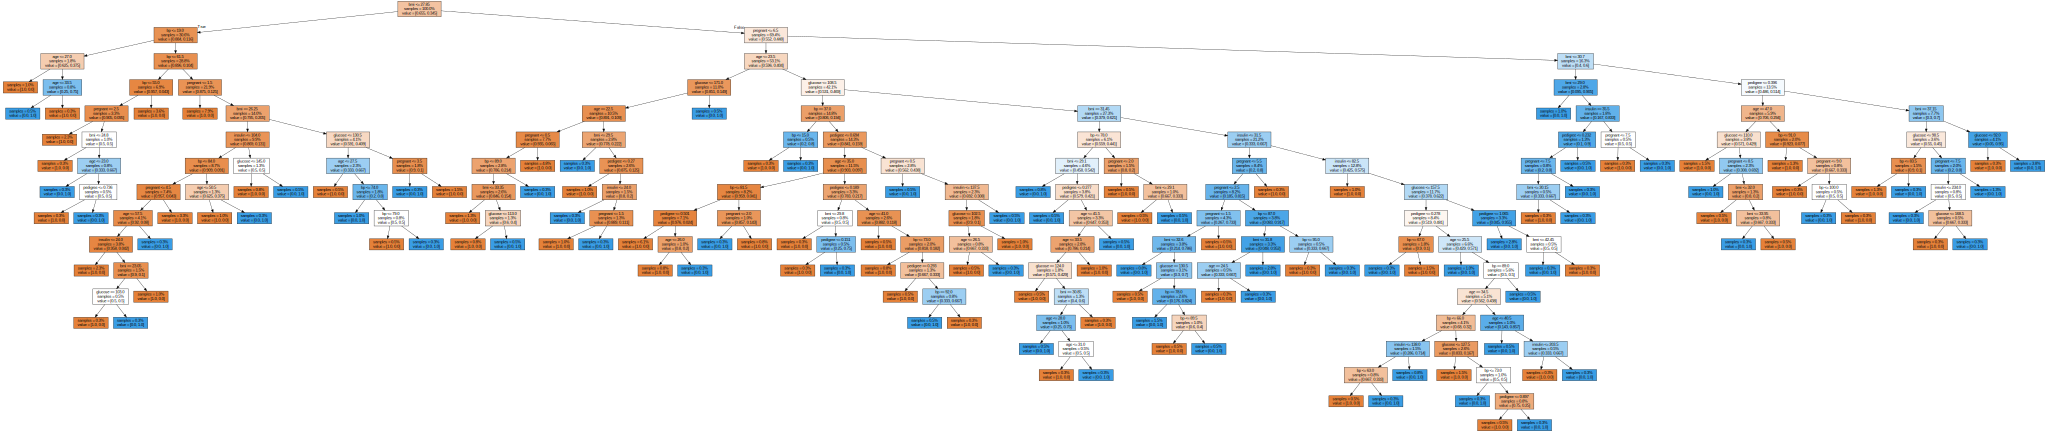

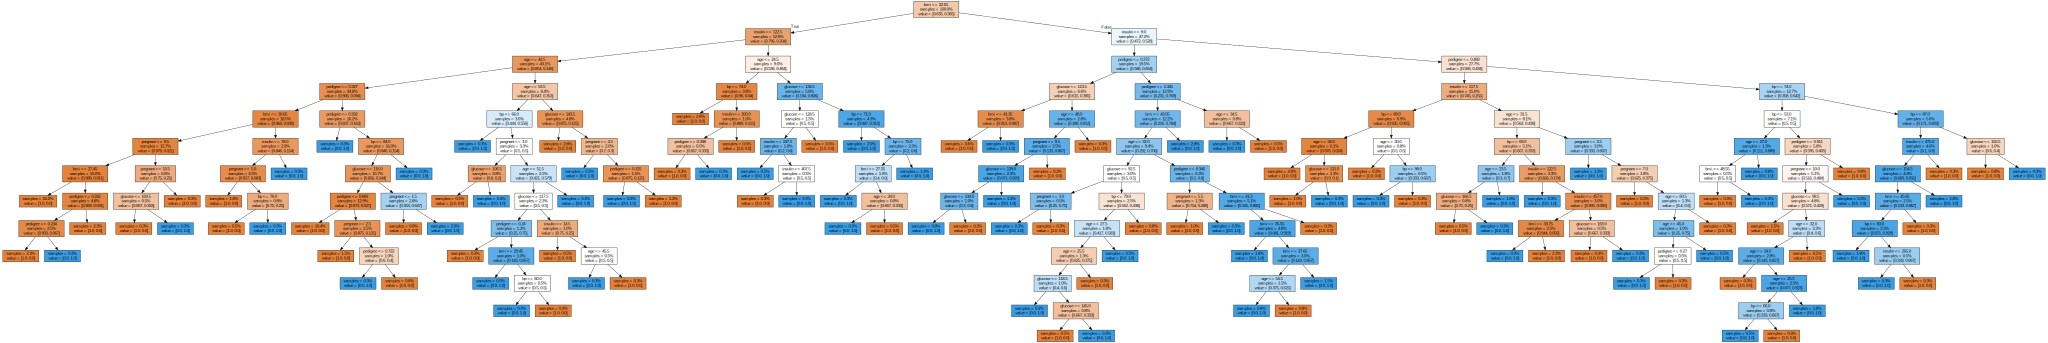

In [20]:
for i in range(3):
    tree = clf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               #max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

###Optimization

In [22]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f7a84ccd210>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f7a84cccf40>})

In [23]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 17, 'n_estimators': 93}


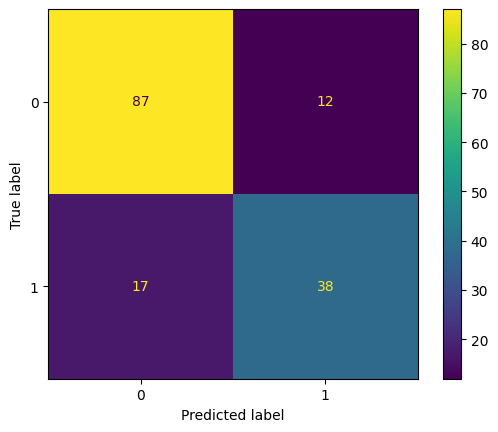

In [25]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [34]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_test, y_test)
y_pred = neigh.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
#precision = precision_score(y_test, y_pred)
#recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
#print("Precision:", precision)
#print("Recall:", recall)

Accuracy: 0.8051948051948052


###Testing

In [37]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_test, y_test)
y_pred = neigh.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print(f'the test has {len(X_test)} batchs')
listProb = clf.predict_proba(X_test)
if y_pred[30] == '1':
  class_out = 'with diabetes'
else:
  class_out = 'without diabetes' 


print(f'the batch 0 is {y_pred[30]} %s' %(class_out))
print(f'prob {listProb[30]}')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

the test has 154 batchs
the batch 0 is 0 without diabetes
prob [0.84 0.16]
Accuracy: 0.8051948051948052
